In [684]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import *

import pickle
import warnings
warnings.filterwarnings('ignore')

In [634]:
house = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/Flip Robo/Dataset/Project-Housing_splitted/train.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

## EDA

In [635]:
house.shape

(1168, 81)

Shape of our dataset 1168, 81

In [636]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

**Information of the dataset**
- RangeIndex: 0 to 1167
- Total Columns: 81 columns
- dtypes: float64(3), int64(35), object(43)

In [637]:
house.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

**Description of Dataset:**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

## Null Values

In [638]:
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

These are the columns with null values.

**- Graph of Null Columns.**

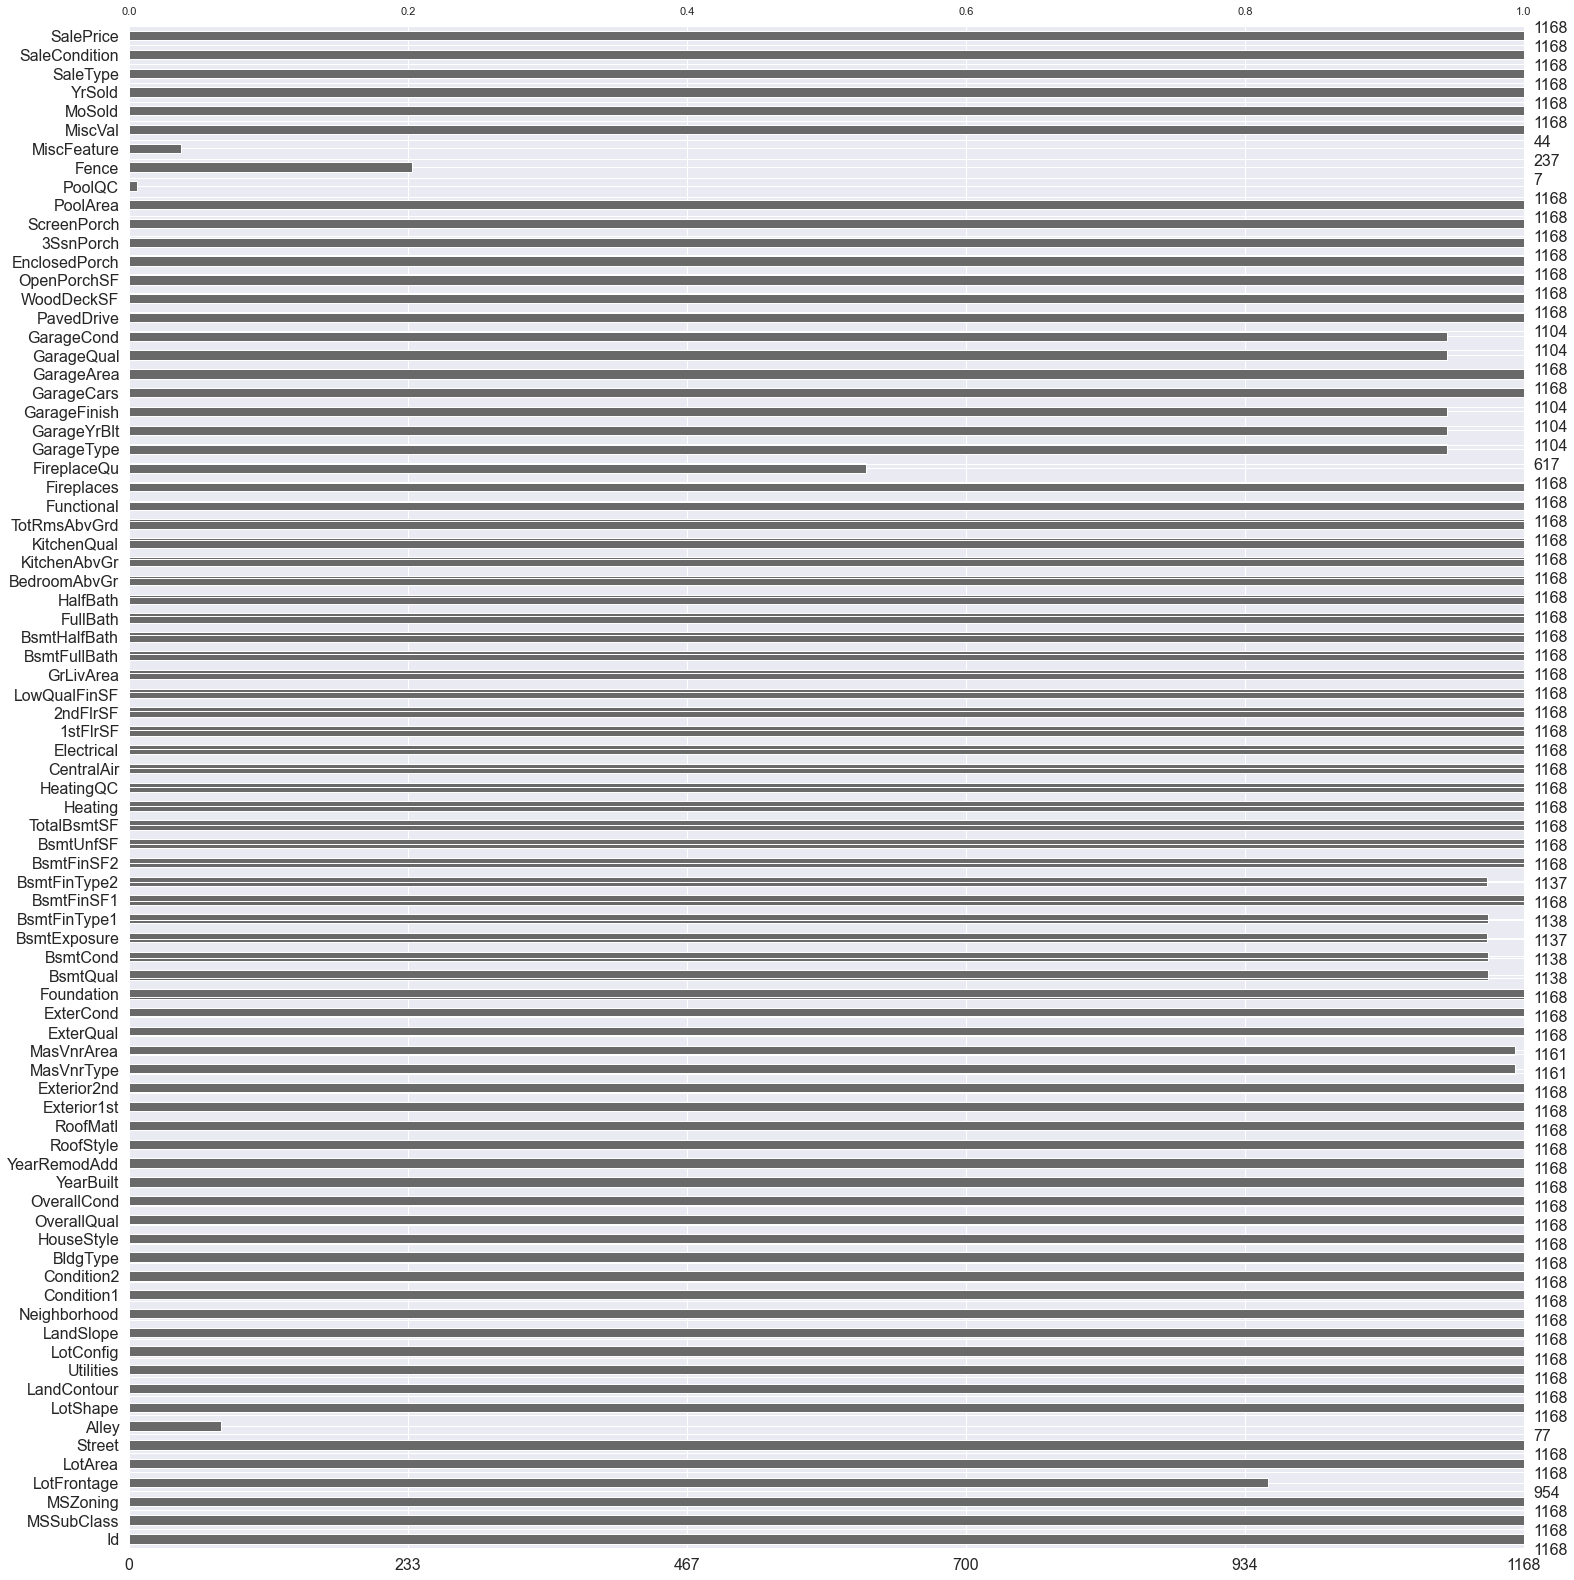

In [639]:
msno.bar(house)
plt.show()

In [640]:
house.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)
house.shape

(1168, 78)

Dropping the Columns which has 70% of Null Values.

**- Filling the Null Values.**

In [641]:
null = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence']

In [642]:
for i in null:
    print('\n',i)
    print(house[i].unique(),'\n ----------------------------------------')


 LotFrontage
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.] 
 ----------------------------------------

 MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan] 
 ----------------------------------------

 MasVnrArea
[0.000e+00 4.800e+02 1.260e+02 1.800e+02 6.700e+01 2.230e+02 6.600e+01
 8.200e+01 1.740e+02 3.040e+02 1.720e+02 1.660e+02 1.840e+02 3.500e+02
 4.120e+02 1.000e+00 1.890e+02 1.120e+02 5.000e+01 2.200e+02 1.600e+01
 6.300e+02 2.810e+02 2.870e+02 3.400e+02 2.160e+02       nan 1.400e+02
 1.830

Unique values for Every columns with Null Values.

**- Filling the values with mean()**

In [643]:
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].mean())

**- Filling the values with median()**

In [644]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())

**- Filling the values with mode()**

In [645]:
def fill(x):
    house[x] = house[x].fillna(house[x].mode()[0])

In [646]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence']

In [647]:
for i in n:
    fill(i)

In [648]:
house.columns[house.isnull().any()]

Index([], dtype='object')

Now, No null values present in our dataset.

## Encoding.

In [649]:
ob = []
for col in house:
    if house[col].dtype == 'object':
        ob.append(col)

Finding all the columns with dtype = Object.

In [650]:
for i in ob:
    print('\n',i)
    print(house[i].unique(),'\n ----------------------------------------')


 MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)'] 
 ----------------------------------------

 Street
['Pave' 'Grvl'] 
 ----------------------------------------

 LotShape
['IR1' 'Reg' 'IR2' 'IR3'] 
 ----------------------------------------

 LandContour
['Lvl' 'Bnk' 'HLS' 'Low'] 
 ----------------------------------------

 Utilities
['AllPub'] 
 ----------------------------------------

 LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3'] 
 ----------------------------------------

 LandSlope
['Gtl' 'Mod' 'Sev'] 
 ----------------------------------------

 Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste'] 
 ----------------------------------------

 Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn'] 
 ----------------------------------------

 Condition2
['No

Unique values for Every columns with dtypes = Object.

In [651]:
house.drop('Utilities',axis = 1, inplace = True )

Dropping the column with single value.

In [652]:
ob.remove('Utilities')

**- Encoding every column where dtype = Object.**

In [653]:
lb = LabelEncoder()
for i in ob:
    house[i] = lb.fit_transform(house[i])

In [654]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int64  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int64  
 6   LotShape       1168 non-null   int64  
 7   LandContour    1168 non-null   int64  
 8   LotConfig      1168 non-null   int64  
 9   LandSlope      1168 non-null   int64  
 10  Neighborhood   1168 non-null   int64  
 11  Condition1     1168 non-null   int64  
 12  Condition2     1168 non-null   int64  
 13  BldgType       1168 non-null   int64  
 14  HouseStyle     1168 non-null   int64  
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

No Object values present in our dataset.

## Features Selection.

**- Seperating the Features & Target.**

In [655]:
x = house.drop('SalePrice',axis=1)
y = house.SalePrice

**- Applying SelectKBest & F_Classif.**

In [656]:
best_feature = SelectKBest(score_func = f_classif, k =60)
fit = best_feature.fit(x,y)

In [657]:
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [658]:
feature_score = pd.concat([column,score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(40,'Scores')

Feature Name    Scores
15   OverallQual  5.303071
71       MiscVal  3.564855
25     ExterQual  3.514221
44     GrLivArea  2.977506
28      BsmtQual  2.876879
51   KitchenQual  2.617125
59    GarageCars  2.578547
47      FullBath  2.435854
60    GarageArea  2.316328
58  GarageFinish  2.187163
17     YearBuilt  2.133300
41      1stFlrSF  2.036680
36   TotalBsmtSF  1.867714
24    MasVnrArea  1.852976
5         Street  1.835751
4        LotArea  1.826320
18  YearRemodAdd  1.813783
57   GarageYrBlt  1.712783
37       Heating  1.707885
52  TotRmsAbvGrd  1.656866
2       MSZoning  1.640044
54    Fireplaces  1.591973
39    CentralAir  1.557680
27    Foundation  1.528516
32    BsmtFinSF1  1.482500
42      2ndFlrSF  1.476305
65   OpenPorchSF  1.460290
6       LotShape  1.407526
35     BsmtUnfSF  1.401635
38     HeatingQC  1.358939
48      HalfBath  1.337597
10  Neighborhood  1.281079
64    WoodDeckSF  1.254936
30  BsmtExposure  1.214154
55   FireplaceQu  1.203591
29      BsmtCond  1.190161
20      RoofMatl  1.179426
23    MasVnrType  1.171156
56    GarageType  1.169772
49  BedroomAbvGr  1.146460

Score of top 40 columns.

**- Top 40 Features.**

In [659]:
top = house[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
             'GarageArea','GarageFinish','YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea',
             'YearRemodAdd','GarageYrBlt','Heating','TotRmsAbvGrd','MSZoning','Fireplaces','CentralAir',
             'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC','HalfBath',
             'Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl','MasVnrType',
             'GarageType','BedroomAbvGr','SalePrice']]

**- Graph with top 40 features with respect to target.**

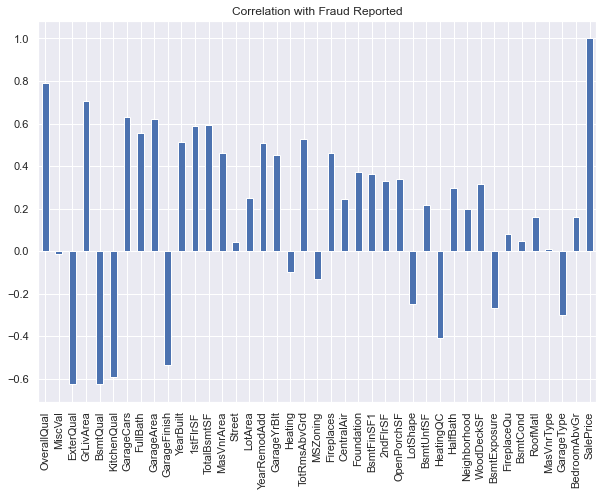

In [660]:
top.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Fraud Reported')
plt.show()

**Found that:**
    
    MasVnrType, MiscVal, are the lowest as compared to other, so dropping these columns.

In [661]:
top.drop(columns = ['MasVnrType','MiscVal'],axis = 1, inplace = True)

## Correlation.

In [663]:
corr = top.corr()
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

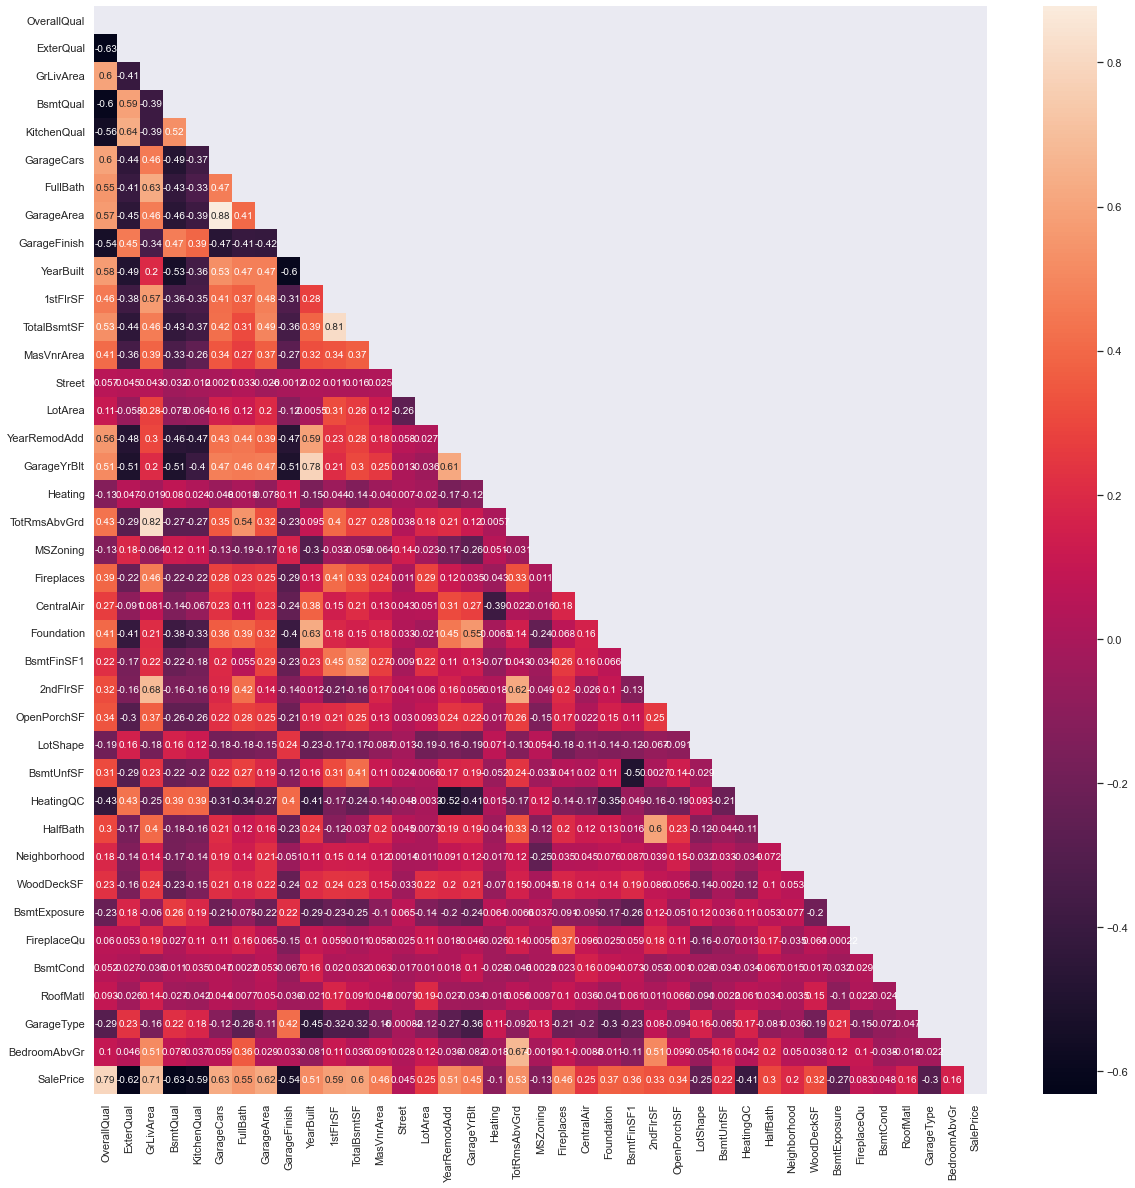

In [664]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,fmt = '.2g',mask = mask)

Dropping the columns whose correlation is more than 80%.

**Found that:**
- TotRmsAbvGrd & GrLivArea, has the correlation of 82%.
- GarageArea & GarageCars, has the correlation of 88%.
- TotalBsmtSF & 1stFlrSF, has the correlation of 81%.

In [665]:
top.drop(columns = ['TotRmsAbvGrd','GarageArea','TotalBsmtSF'],axis = 1, inplace = True)

## Visualization.

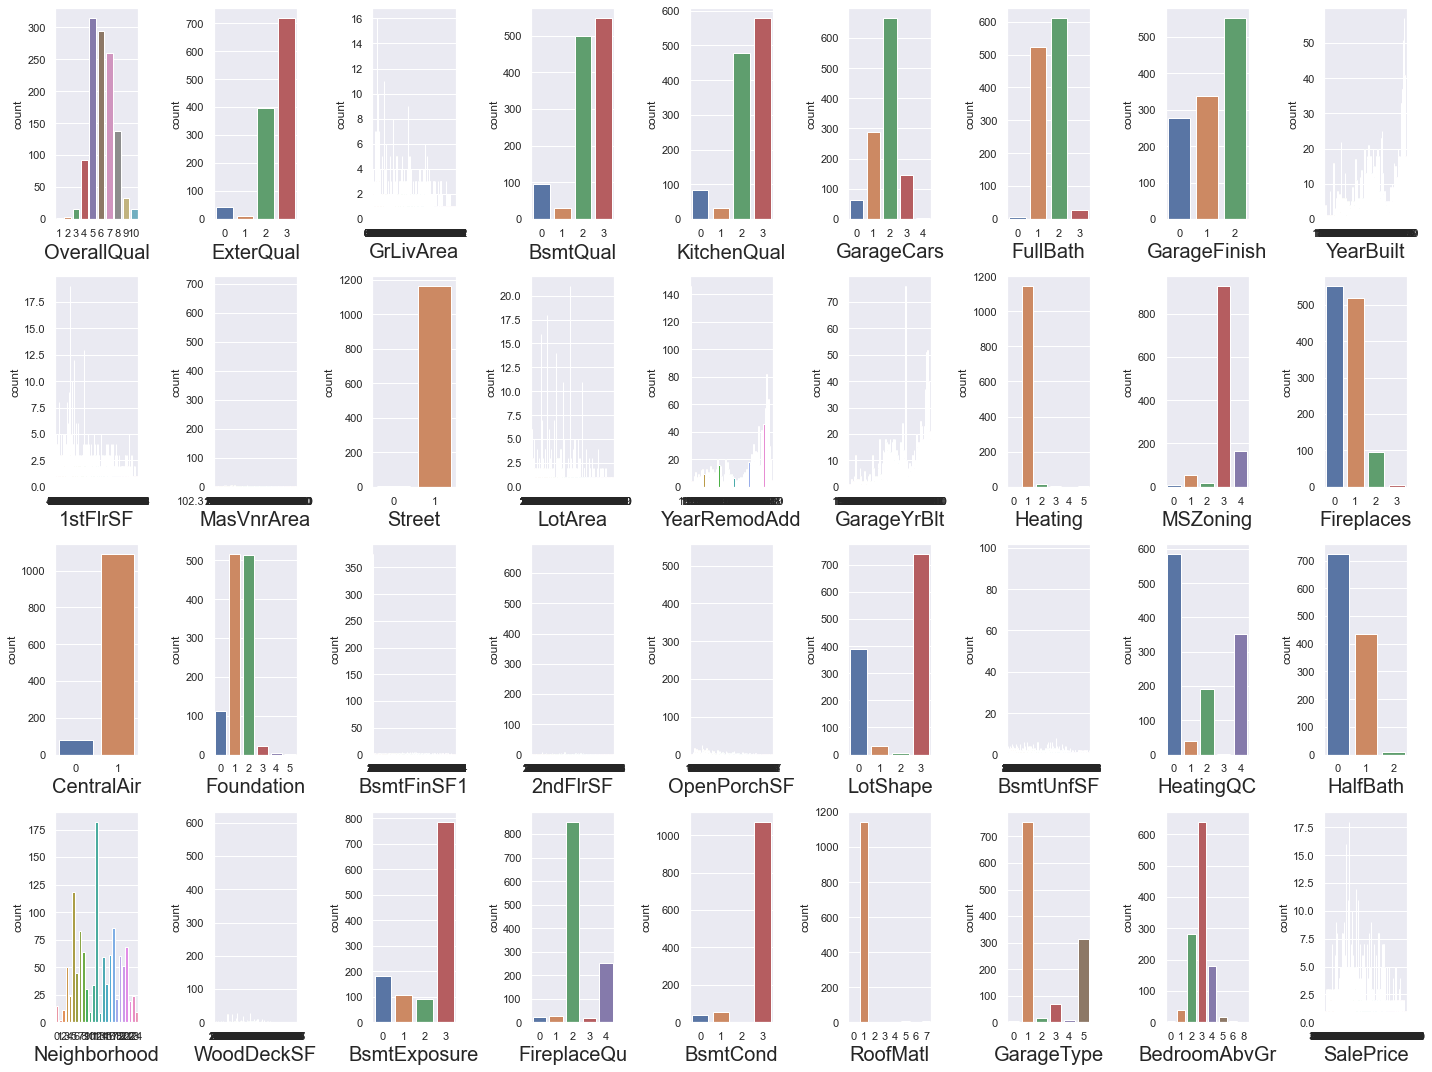

In [667]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.countplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Countplot for top features.

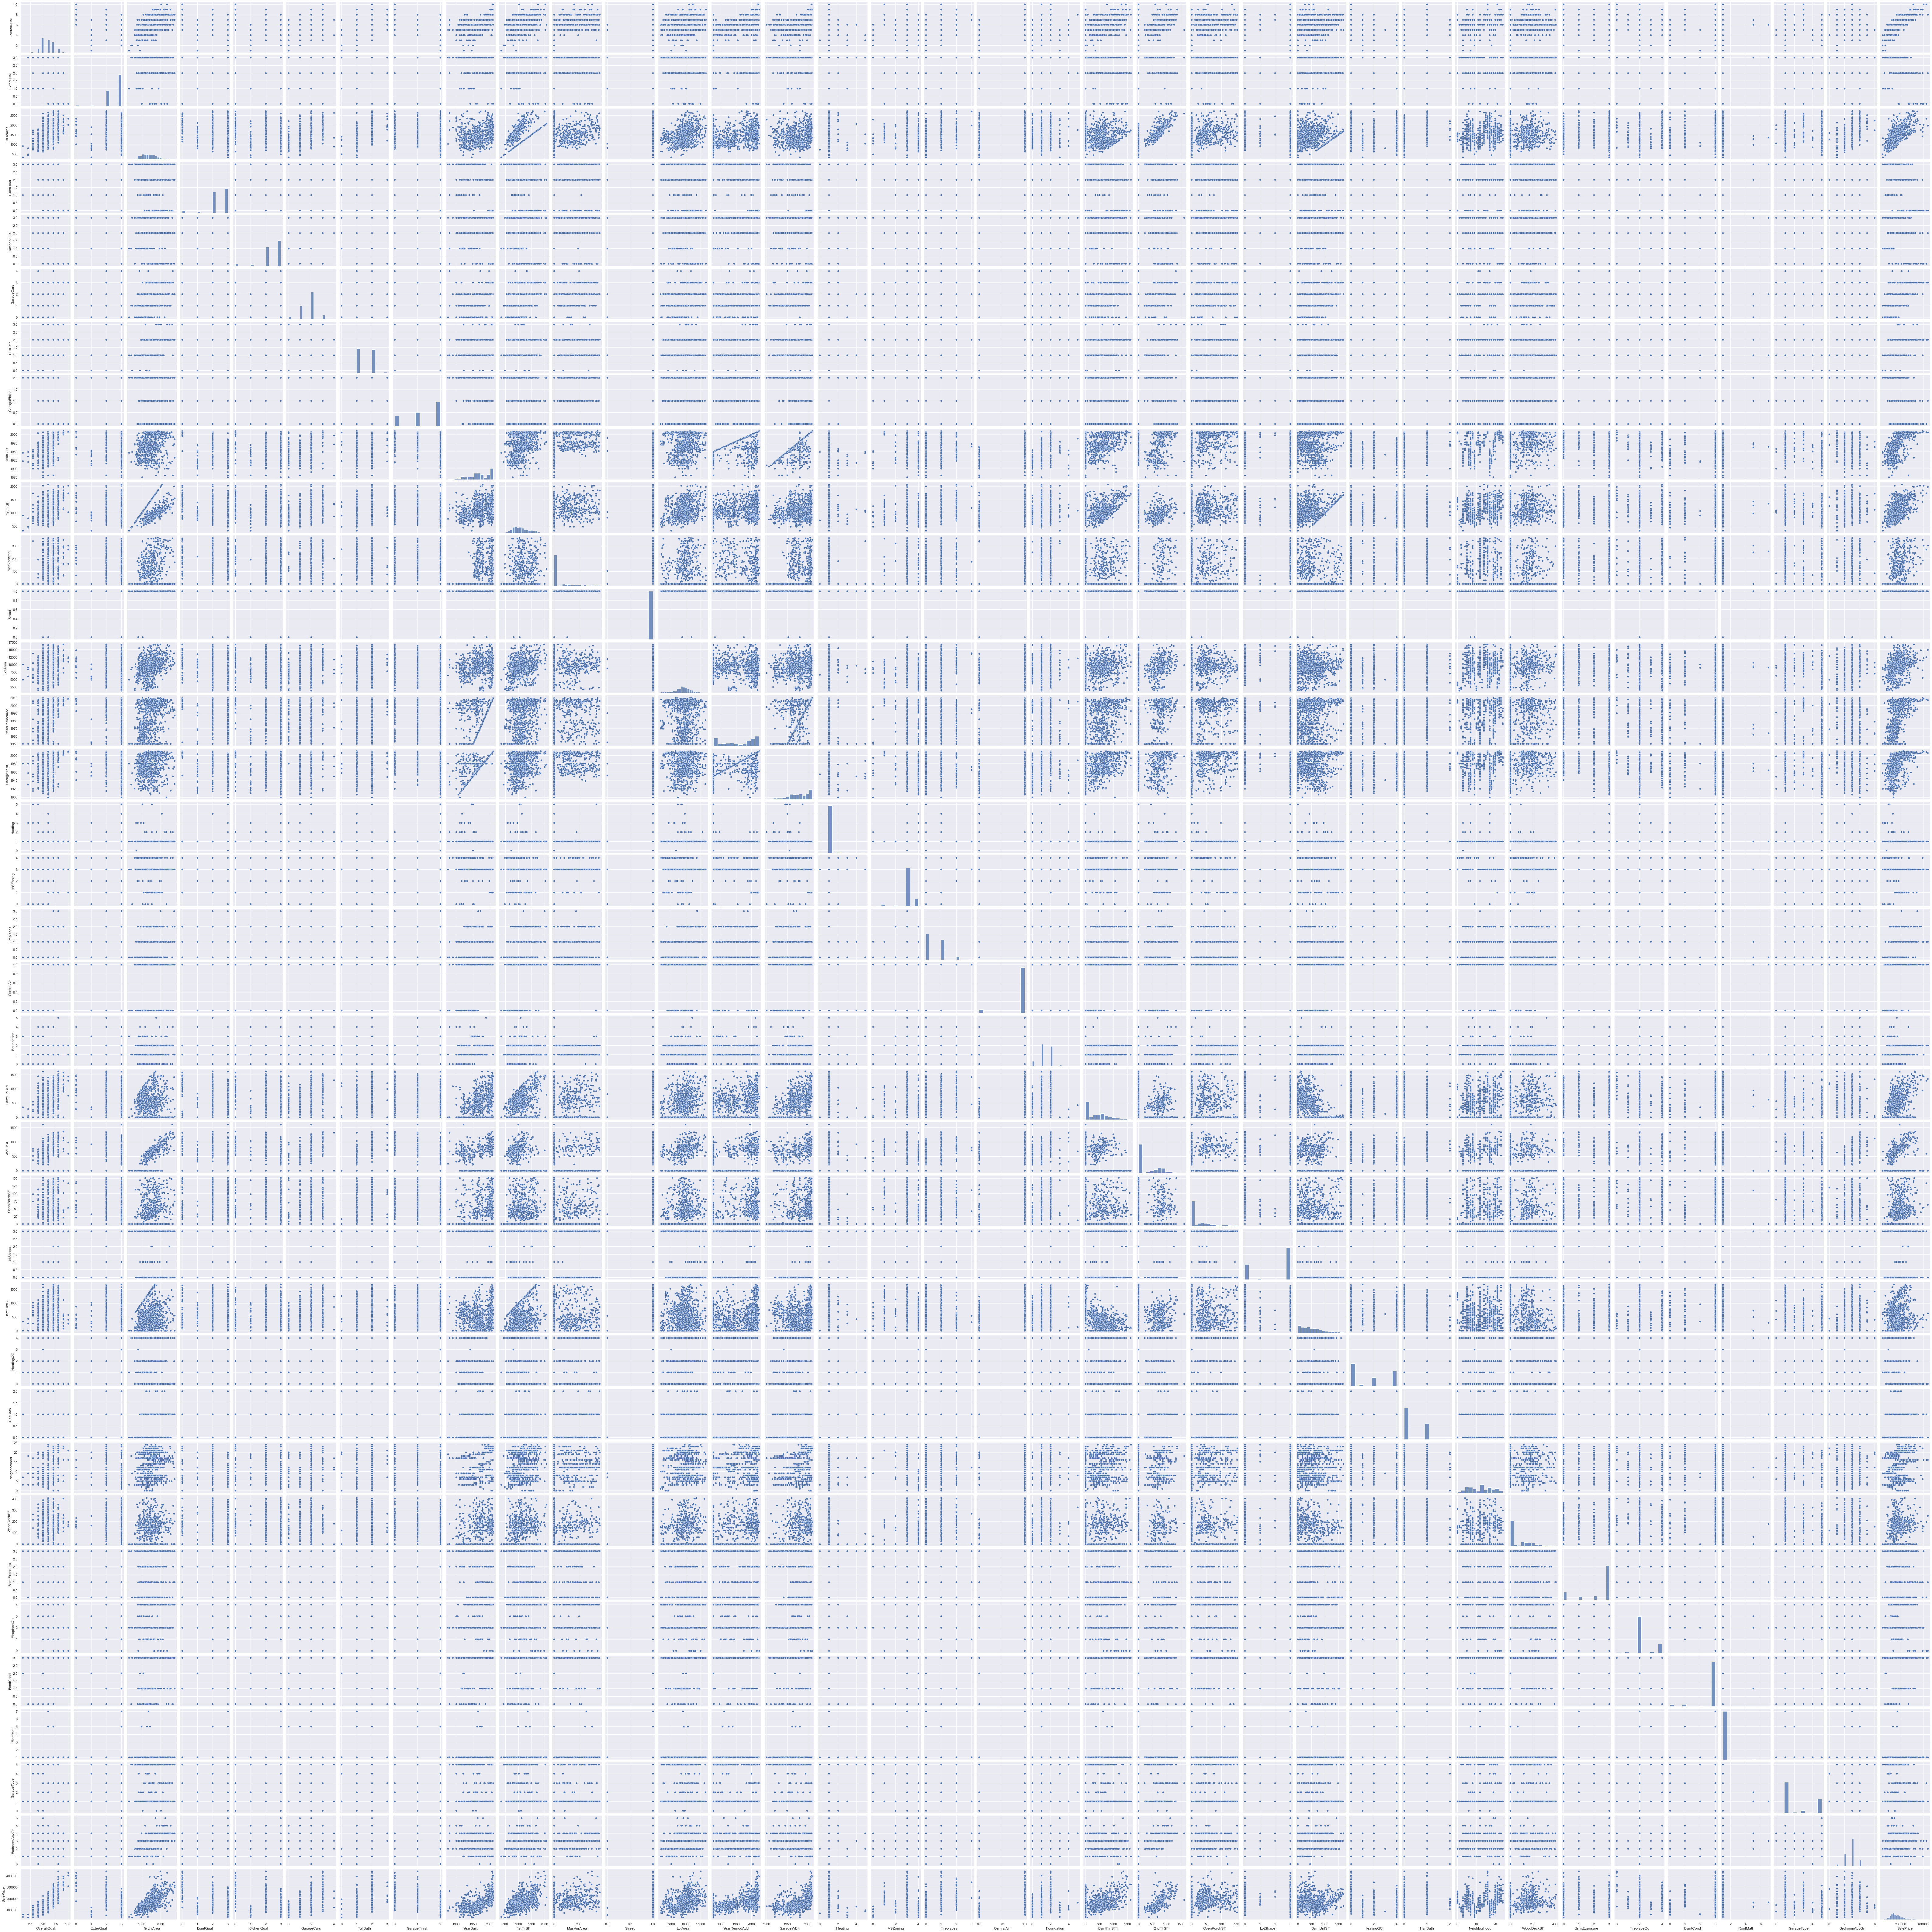

In [683]:
sns.pairplot(top)

Pairplot of Top Features.

**- Normal Distribution.**

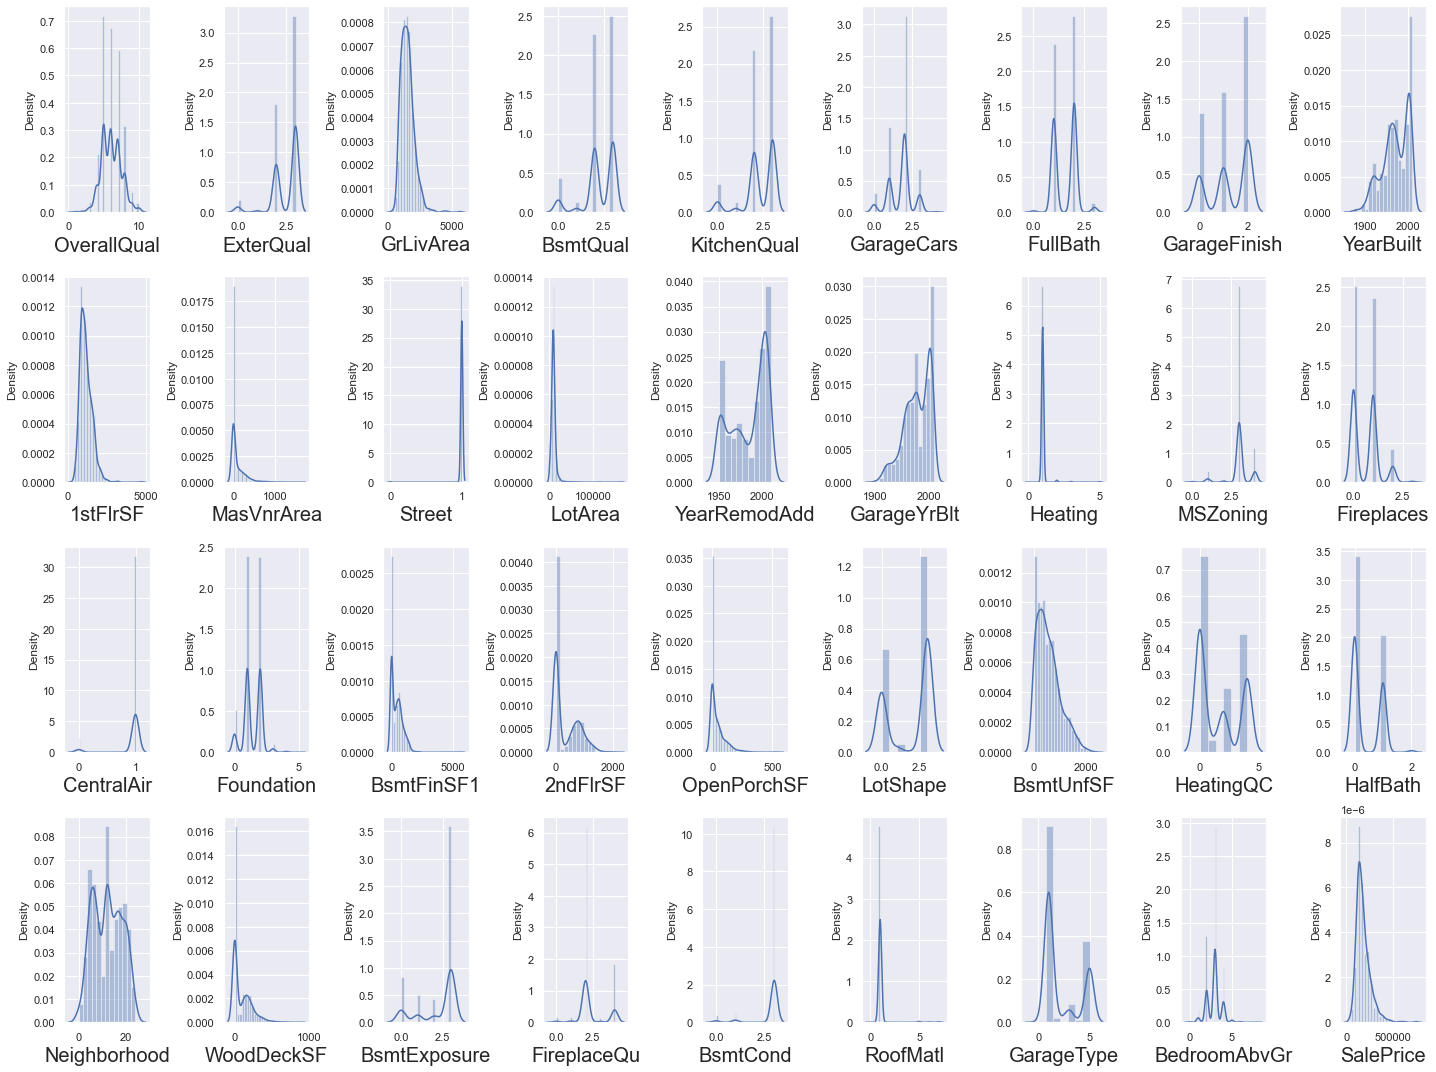

In [441]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.distplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Some columns are not normally distributed.

**- Outliers.**

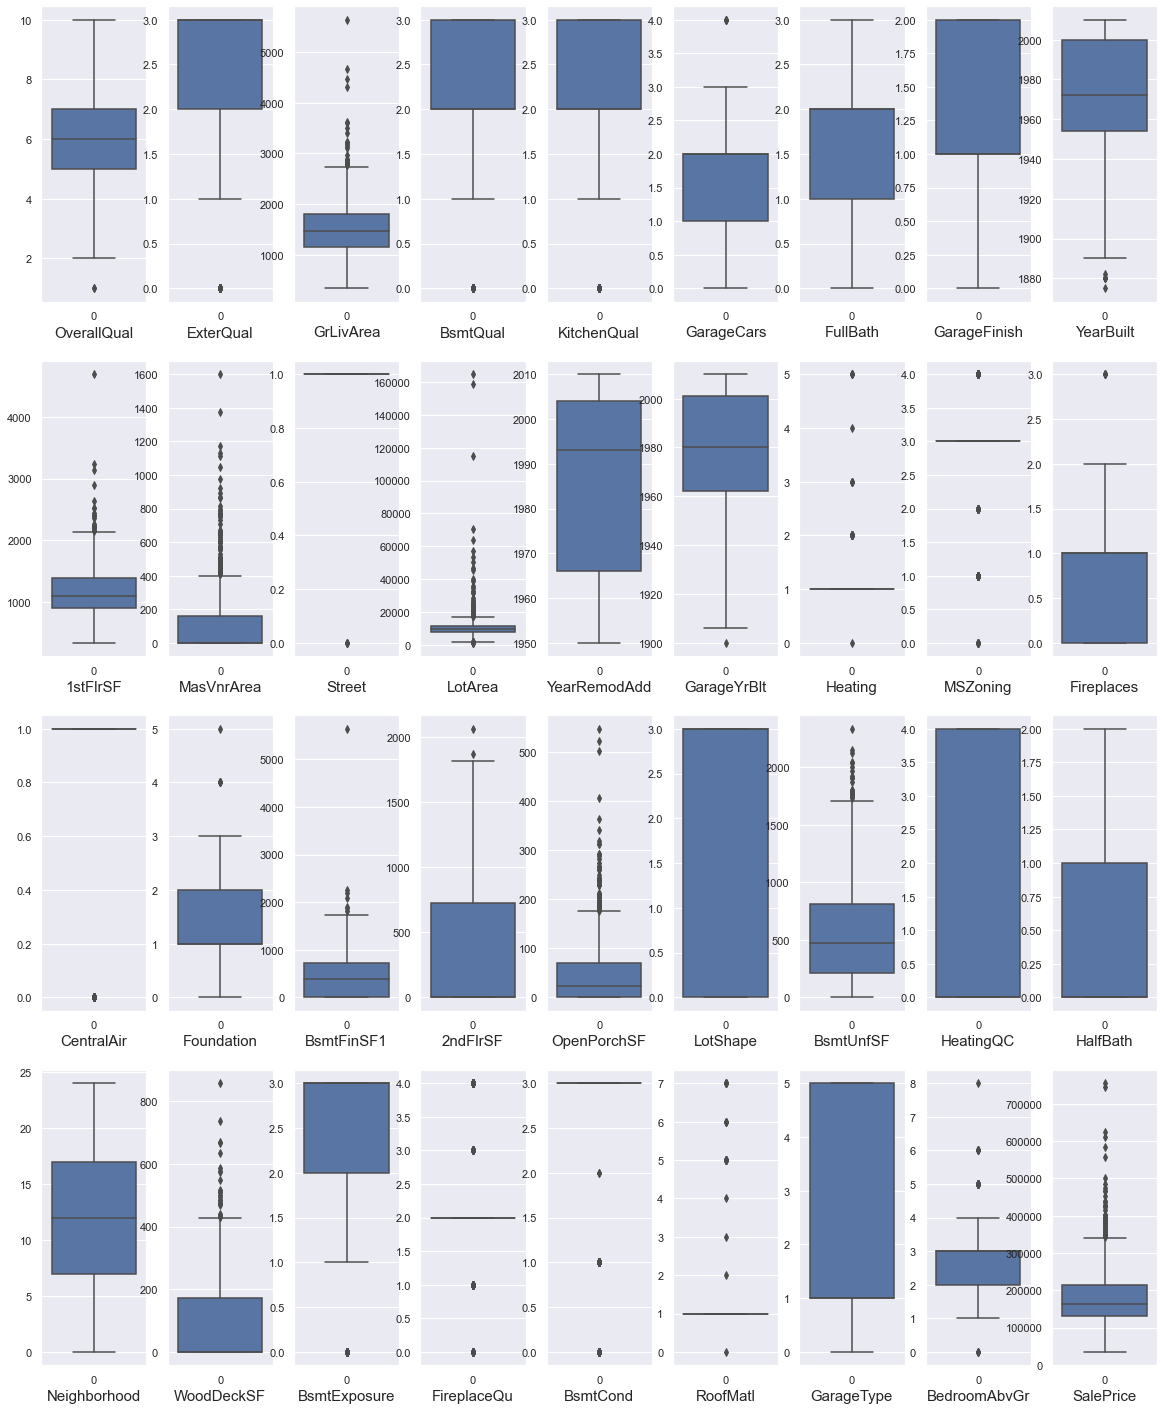

In [442]:
plt.figure(figsize = (20,25))
graph = 1
for column in top:
    if graph <= 36:
        plt.subplot(4,9,graph)
        ax = sns.boxplot(data = top[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Outliers are present in some of the columns.

**- Removing outliers.**

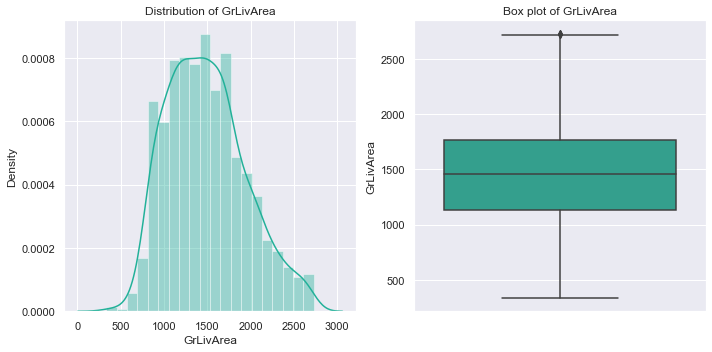

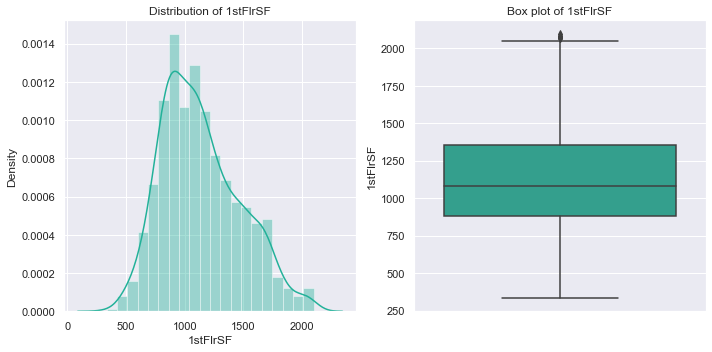

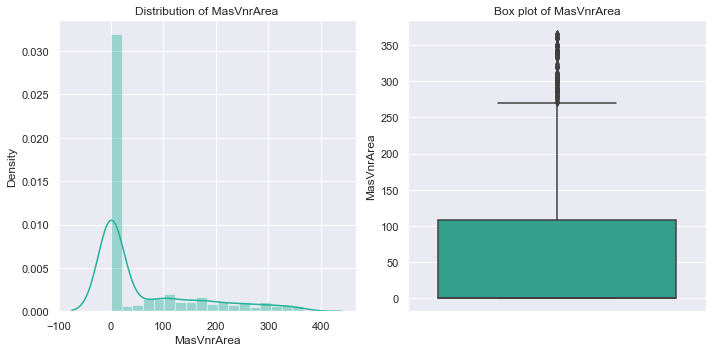

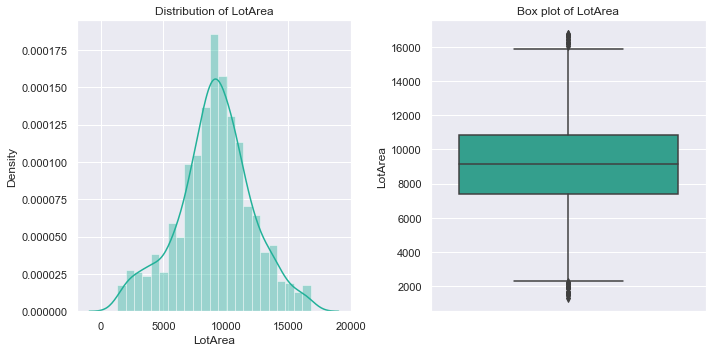

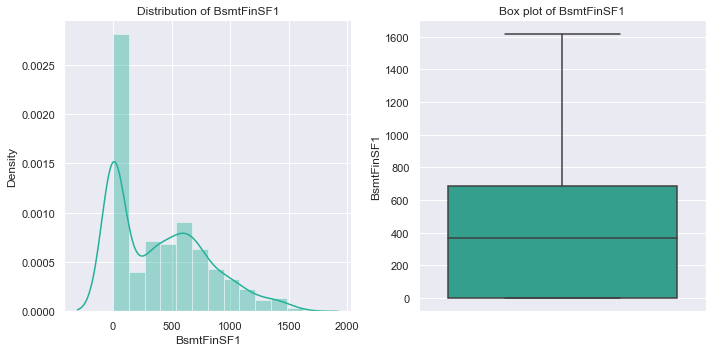

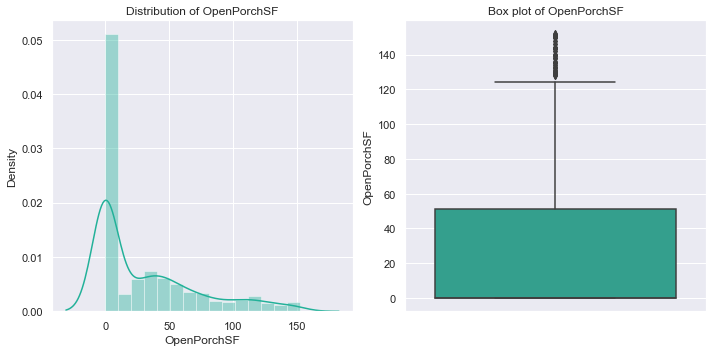

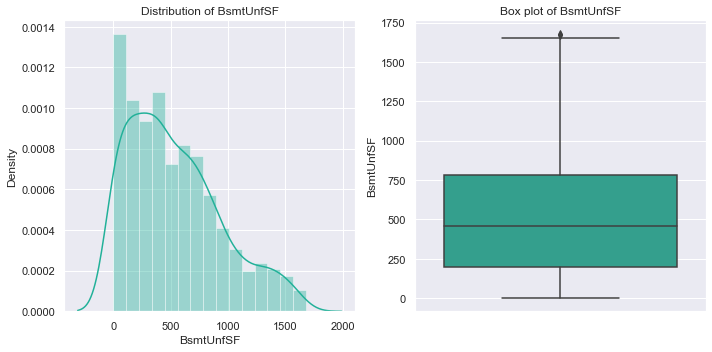

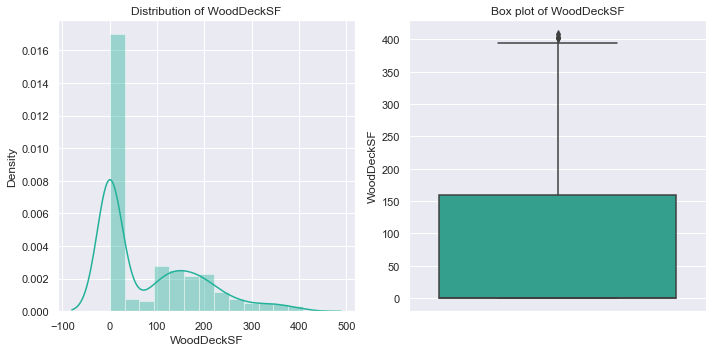

(923, 36)


In [669]:
def remove_outliers(x):
    global top
    Q1= top[x].quantile(0.25)
    Q3 = top[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(top[x] > upper_limit)
    top = top.drop(top.index[index])
    top.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(top[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=top[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['GrLivArea','1stFlrSF','MasVnrArea','LotArea','BsmtFinSF1','OpenPorchSF','BsmtUnfSF','WoodDeckSF']:
    remove_outliers(i)
print(top.shape)

OUR FINAL DATASET IS NOW NORMALLY DISTRIBUTED & REMOVED OUTLIERS, AND AFTER REMOVING THE OUTLIERS, SHAPE OF OUR DATASET IS 923, 36. 

## Model Building.

**- Seperating the Features & Target of Top Features.**

In [671]:
x_top = top.drop('SalePrice',axis = 1)
y_top = top.SalePrice

**- Scaling the Features.**

In [672]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_top)

**- Train Test Split.**

In [673]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_top,test_size=0.20,random_state=90)

**- Function for Training & Testing.**

In [674]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evalution ----- \n')
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [675]:
lr = LinearRegression()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
hgb = HistGradientBoostingRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()

**- Linear Regression.**


 ----- Train Result ----- 

R2 Score: 0.8760041136039864

 ----- Test Result ----- 

R2 Score: 0.8971125451644469

 ----- Model Evalution ----- 

Mean Absolute Error: 14211.539583153666

 Scatter Plot 



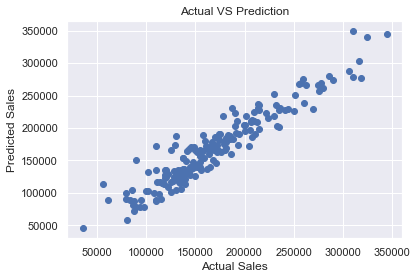

In [676]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9815829559988335

 ----- Test Result ----- 

R2 Score: 0.8862419429705594

 ----- Model Evalution ----- 

Mean Absolute Error: 14824.485873873875

 Scatter Plot 



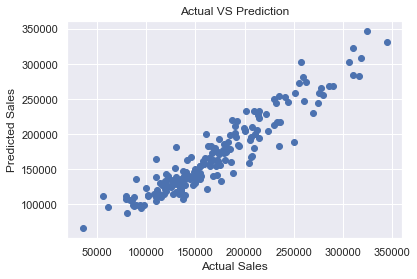

In [677]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Regressor.**


 ----- Train Result ----- 

R2 Score: 0.8892282646684366

 ----- Test Result ----- 

R2 Score: 0.860045413689696

 ----- Model Evalution ----- 

Mean Absolute Error: 16781.463879145893

 Scatter Plot 



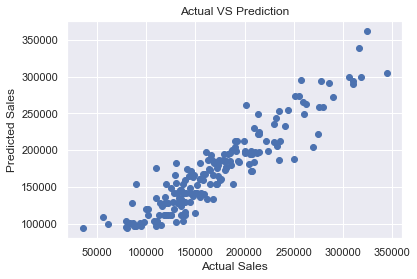

In [678]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9595292656376133

 ----- Test Result ----- 

R2 Score: 0.892148595720675

 ----- Model Evalution ----- 

Mean Absolute Error: 14328.461379817269

 Scatter Plot 



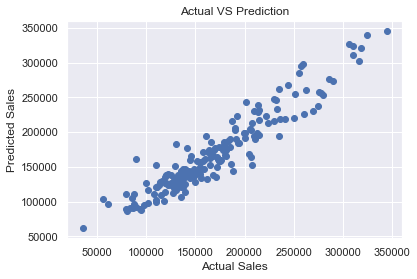

In [679]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- HistGradientBoosting Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9870244410795318

 ----- Test Result ----- 

R2 Score: 0.8799940131761304

 ----- Model Evalution ----- 

Mean Absolute Error: 14616.643366379834

 Scatter Plot 



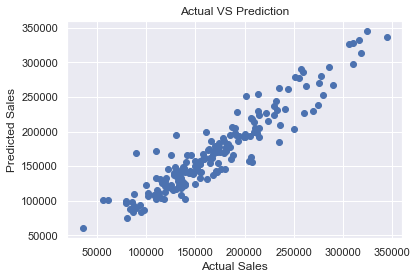

In [680]:
hgb.fit(x_train,y_train)
score(hgb, x_train,x_test,y_train,y_test,train = True)
score(hgb, x_train,x_test,y_train,y_test,train = False)

**- XGB Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9999200464121489

 ----- Test Result ----- 

R2 Score: 0.8569479477466962

 ----- Model Evalution ----- 

Mean Absolute Error: 16353.914653716216

 Scatter Plot 



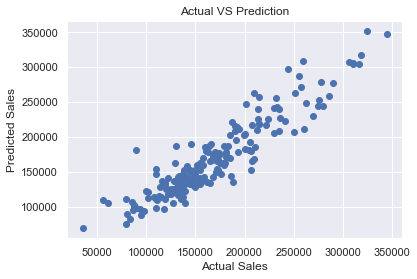

In [681]:
xgb.fit(x_train,y_train)
score(xgb, x_train,x_test,y_train,y_test,train = True)
score(xgb, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Regressor.**


 ----- Train Result ----- 

R2 Score: 0.8754474973001353

 ----- Test Result ----- 

R2 Score: 0.836770321726306

 ----- Model Evalution ----- 

Mean Absolute Error: 17267.794594594594

 Scatter Plot 



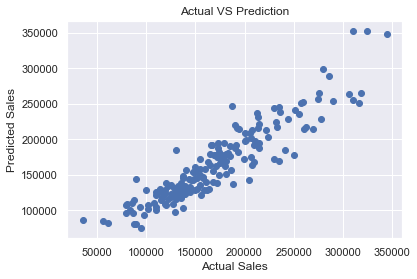

In [682]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

            GradientBoosting Regressor, is giving the best score among all other models.

## Hyperparameter Tuning.

In [505]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [506]:
param = {'n_estimators':range(0,100,10),
         'learning_rate':[0.1,0.3,0.5,0.7,0.8,1.0],
         'criterion':['friedman_mse', 'squared_error'],
         'loss':['squared_error', 'absolute_error'],
         'random_state':range(1,10),
         'max_features':['auto', 'sqrt']}

In [508]:
grid = GridSearchCV(gb,param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 90,
 'random_state': 2}

In [561]:
gb_hyp = GradientBoostingRegressor(criterion = 'friedman_mse',learning_rate =  0.1,loss = 'squared_error',
                                   max_features = 'sqrt',n_estimators = 90,random_state = 2)


 ----- Train Result ----- 

R2 Score: 0.95027979876775

 ----- Test Result ----- 

R2 Score: 0.9060750260311207

 ----- Model Evalution ----- 

Mean Absolute Error: 13037.56131117366

 Scatter Plot 



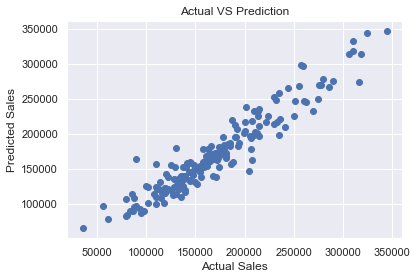

In [562]:
gb_hyp.fit(x_train,y_train)
score(gb_hyp, x_train,x_test,y_train,y_test,train = True)
score(gb_hyp, x_train,x_test,y_train,y_test,train = False)

       Post Tuning score is best then the default parameters.

## Testing Dataset.

In [565]:
house_test = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/Flip Robo/Dataset/Project-Housing_splitted/test.csv')
house_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [568]:
house_test.columns[house_test.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [569]:
house_test.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)

In [573]:
house_test['MasVnrArea'] = house_test['MasVnrArea'].fillna(house_test['MasVnrArea'].mean())

In [574]:
house_test['LotFrontage'] = house_test['LotFrontage'].fillna(house_test['LotFrontage'].median())
house_test['GarageYrBlt'] = house_test['GarageYrBlt'].fillna(house_test['GarageYrBlt'].median())

In [575]:
def fill(x):
    house_test[x] = house_test[x].fillna(house_test[x].mode()[0])

In [581]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence','Electrical']

In [582]:
for i in n:
    fill(i)

In [583]:
house_test.columns[house_test.isnull().any()]

Index([], dtype='object')

In [584]:
house_test.drop('Utilities',axis = 1, inplace = True )

In [588]:
ob_test = []
for col in house_test:
    if house_test[col].dtype == 'object':
        ob_test.append(col)

In [589]:
lb = LabelEncoder()
for i in ob_test:
    house_test[i] = lb.fit_transform(house_test[i])

In [595]:
top_test = house_test[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
                       'GarageFinish','YearBuilt','1stFlrSF','MasVnrArea','Street','LotArea',
                       'YearRemodAdd','GarageYrBlt','Heating','MSZoning','Fireplaces','CentralAir',
                       'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC',
                       'HalfBath','Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl',
                       'GarageType','BedroomAbvGr']]

In [ ]:
'TotRmsAbvGrd','GarageArea','TotalBsmtSF'

In [594]:
top_test

OverallQual  MiscVal  ExterQual  GrLivArea  BsmtQual  KitchenQual  \
0              9        0          2       1922         0            2   
1              8        0          2       1360         2            2   
2              8        0          2       1788         2            0   
3              7        0          3       1564         3            1   
4              6        0          2       1933         2            2   
..           ...      ...        ...        ...       ...          ...   
287            8        0          3       1563         2            2   
288            5        0          3        990         2            3   
289            6      700          3       1004         3            3   
290            6        0          3       1664         3            3   
291            6        0          3        987         3            3   

     GarageCars  FullBath  GarageArea  GarageFinish  ...  HalfBath  \
0             3         2         676             0  ...         0   
1             2         1         565             1  ...         0   
2             2         2         522             1  ...         0   
3             1         1         234             2  ...         1   
4             3         2         668             0  ...         1   
..          ...       ...         ...           ...  ...       ...   
287           3         2         758             1  ...         0   
288           2         1         672             2  ...         0   
289           2         1         480             0  ...         0   
290           2         2         420             2  ...         0   
291           1         1         264             2  ...         1   

     Neighborhood  WoodDeckSF  BsmtExposure  FireplaceQu  BsmtCond  RoofMatl  \
0              21         178             1            2         2         0   
1              21          63             0            0         2         0   
2               4         202             0            4         2         0   
3               5           0             3            2         2         0   
4              20         100             2            2         2         0   
..            ...         ...           ...          ...       ...       ...   
287            20         144             3            2         2         0   
288             4           0             3            2         2         0   
289            11           0             3            4         2         0   
290             2           0             3            2         2         0   
291             1          72             3            2         0         0   

     MasVnrType  GarageType  BedroomAbvGr  
0             3           1             3  
1             2           1             1  
2             2           1             3  
3             2           1             3  
4             3           3             4  
..          ...         ...           ...  
287           3           1             3  
288           2           5             3  
289           1           1             2  
290           2           5             3  
291           1           5             2  

[292 rows x 40 columns]

In [596]:
y_pred = gb_hyp.predict(top_test)

In [598]:
a = []
for i in y_pred:
    a.append(i)

In [599]:
test = pd.DataFrame({'TEST' : a})
test.head(50)

TEST
0   310088.543882
1   290352.395591
2   257274.190800
3   279147.659430
4   299193.188175
5   261860.182107
6   302525.141075
7   274537.009266
8   322419.231011
9   299086.387709
10  250385.838736
11  280148.827281
12  237117.269632
13  276435.464627
14  274626.697456
15  283643.082669
16  259523.166298
17  267150.473323
18  295808.847253
19  299981.162257
20  275709.706966
21  258349.359916
22  277322.262453
23  264801.849559
24  257360.246716
25  284726.869228
26  267075.100582
27  299285.711020
28  297510.105139
29  236371.026794
30  262443.879657
31  274537.009266
32  301226.295129
33  278096.095930
34  250385.838736
35  278258.320000
36  307169.937356
37  313705.325539
38  298001.982103
39  306613.341950
40  259523.166298
41  317731.489372
42  293305.269603
43  265674.760512
44  261392.558897
45  286219.576468
46  284726.869228
47  231934.904905
48  288192.030563
49  321813.245488

## Saving the Model.

In [685]:
filename = 'House_model.pickle'
pickle.dump(gb_hyp, open(filename, 'wb'))